<a href="https://colab.research.google.com/github/harishankarr23/machine-learning/blob/main/Top__Spotify__Songs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

spotify_data = pd.read_csv('/content/drive/MyDrive/universal_top_spotify_songs.csv')

Mounted at /content/drive


In [6]:
spotify_data.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6tNQ70jh4OwmPGpYy6R2o9,Beautiful Things,Benson Boone,1,0,1,NaN,2024-02-19,98,False,...,10,-5.692,1,0.0603,0.151,0.000000,0.140,0.219,105.029,3
1,7AYmToZ5y67fBjq4RLFbuq,TEXAS HOLD 'EM,Beyoncé,2,1,48,NaN,2024-02-19,55,True,...,2,-6.514,1,0.0720,0.588,0.000000,0.135,0.353,110.024,4
2,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,3,1,1,NaN,2024-02-19,99,False,...,9,-5.707,1,0.1570,0.117,0.000021,0.105,0.564,169.994,4
3,0R6NfOiLzLj4O5VbYSJAjf,La Diabla,Xavi,4,2,-3,NaN,2024-02-19,99,False,...,11,-4.372,0,0.0409,0.255,0.000000,0.236,0.697,131.842,3
4,3w0w2T288dec0mgeZZqoNN,CARNIVAL,"¥$, Kanye West, Ty Dolla $ign",5,-3,45,NaN,2024-02-19,74,True,...,1,-5.746,1,0.1590,0.189,0.000000,0.339,0.311,148.144,4


In [7]:
spotify_data.tail()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
455685,0AYt6NMyyLd0rLuvr0UkMH,Slime You Out (feat. SZA),"Drake, SZA",46,4,0,AE,2023-10-18,84,True,...,5,-9.243,0,0.0502,0.5080,0.000000,0.259,0.105,88.880,3
455686,2Gk6fi0dqt91NKvlzGsmm7,SAY MY GRACE (feat. Travis Scott),"Offset, Travis Scott",47,3,0,AE,2023-10-18,80,True,...,10,-5.060,1,0.0452,0.0585,0.000000,0.132,0.476,121.879,4
455687,26b3oVLrRUaaybJulow9kz,People,Libianca,48,2,0,AE,2023-10-18,88,False,...,10,-7.621,0,0.0678,0.5510,0.000013,0.102,0.693,124.357,5
455688,5ydjxBSUIDn26MFzU3asP4,Rainy Days,V,49,1,0,AE,2023-10-18,88,False,...,9,-8.016,0,0.0875,0.7390,0.000000,0.148,0.282,74.828,4
455689,59NraMJsLaMCVtwXTSia8i,Prada,"cassö, RAYE, D-Block Europe",50,0,0,AE,2023-10-18,94,True,...,8,-5.804,1,0.0375,0.0010,0.000002,0.113,0.422,141.904,4


In [8]:
spotify_data.dtypes

spotify_id             object
name                   object
artists                object
daily_rank              int64
daily_movement          int64
weekly_movement         int64
country                object
snapshot_date          object
popularity              int64
is_explicit              bool
duration_ms             int64
album_name             object
album_release_date     object
danceability          float64
energy                float64
key                     int64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
time_signature          int64
dtype: object

In [9]:
spotify_data.shape

(455690, 25)

In [10]:
spotify_data.columns

Index(['spotify_id', 'name', 'artists', 'daily_rank', 'daily_movement',
       'weekly_movement', 'country', 'snapshot_date', 'popularity',
       'is_explicit', 'duration_ms', 'album_name', 'album_release_date',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')

In [11]:
spotify_data.describe()

,daily_rank,daily_movement,weekly_movement,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,455690.000000,455690.000000,455690.000000,455690.000000,455690.000000,455690.000000,455690.000000,455690.000000,455690.000000,455690.000000,455690.000000,455690.000000,455690.000000,455690.000000,455690.00000,455690.000000,455690.000000
mean,25.484037,0.750580,3.108774,77.816301,194071.633349,0.680020,0.644939,5.391286,-6.623713,0.525864,0.098425,0.289638,0.016569,0.176264,0.53922,122.411574,3.892563
std,14.426821,6.703999,12.383091,15.925482,49964.283308,0.142256,0.165071,3.494687,2.711525,0.499331,0.093175,0.261743,0.087732,0.128978,0.23003,28.571549,0.442151
min,1.000000,-49.000000,-49.000000,0.000000,0.000000,0.000000,0.001890,0.000000,-31.356000,0.000000,0.000000,0.000008,0.000000,0.015400,0.00000,0.000000,0.000000
25%,13.000000,-1.000000,-3.000000,67.000000,162637.000000,0.579000,0.541000,2.000000,-8.067000,0.000000,0.039100,0.077600,0.000000,0.097700,0.36200,99.974000,4.000000
50%,25.000000,0.000000,0.000000,82.000000,187105.000000,0.700000,0.666000,6.000000,-6.249000,1.000000,0.058900,0.194000,0.000001,0.121000,0.53400,119.935000,4.000000
75%,38.000000,2.000000,5.000000,90.000000,219333.000000,0.788000,0.762000,8.000000,-4.795000,1.000000,0.115000,0.463000,0.000080,0.219000,0.72600,141.095000,4.000000
max,50.000000,49.000000,49.000000,100.000000,939666.000000,0.988000,0.997000,11.000000,3.233000,1.000000,0.912000,0.996000,0.974000,0.968000,0.99200,217.969000,5.000000


In [12]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455690 entries, 0 to 455689
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   spotify_id          455690 non-null  object 
 1   name                455667 non-null  object 
 2   artists             455667 non-null  object 
 3   daily_rank          455690 non-null  int64  
 4   daily_movement      455690 non-null  int64  
 5   weekly_movement     455690 non-null  int64  
 6   country             449484 non-null  object 
 7   snapshot_date       455690 non-null  object 
 8   popularity          455690 non-null  int64  
 9   is_explicit         455690 non-null  bool   
 10  duration_ms         455690 non-null  int64  
 11  album_name          455500 non-null  object 
 12  album_release_date  455500 non-null  object 
 13  danceability        455690 non-null  float64
 14  energy              455690 non-null  float64
 15  key                 455690 non-nul

In [13]:
#To check the missing values
spotify_data.isna().sum()

spotify_id               0
name                    23
artists                 23
daily_rank               0
daily_movement           0
weekly_movement          0
country               6206
snapshot_date            0
popularity               0
is_explicit              0
duration_ms              0
album_name             190
album_release_date     190
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
dtype: int64

In [14]:
percent_missvalues = spotify_data.isna().sum().sort_values(ascending=False)*100/len(spotify_data)
percent_missvalues

country               1.361891
album_release_date    0.041695
album_name            0.041695
artists               0.005047
name                  0.005047
key                   0.000000
tempo                 0.000000
valence               0.000000
liveness              0.000000
instrumentalness      0.000000
acousticness          0.000000
speechiness           0.000000
mode                  0.000000
loudness              0.000000
spotify_id            0.000000
energy                0.000000
danceability          0.000000
duration_ms           0.000000
is_explicit           0.000000
popularity            0.000000
snapshot_date         0.000000
weekly_movement       0.000000
daily_movement        0.000000
daily_rank            0.000000
time_signature        0.000000
dtype: float64

In [15]:
#To check duplicate values in dataset
spotify_data.duplicated().sum()

#If there is any duplicate values, drop
    #df.drop_duplicates(inplace=True)

0

                                 index   percent
country                        country  1.361891
album_release_date  album_release_date  0.041695
album_name                  album_name  0.041695
artists                        artists  0.005047
name                              name  0.005047
key                                key  0.000000
tempo                            tempo  0.000000
valence                        valence  0.000000
liveness                      liveness  0.000000
instrumentalness      instrumentalness  0.000000
acousticness              acousticness  0.000000
speechiness                speechiness  0.000000
mode                              mode  0.000000
loudness                      loudness  0.000000
spotify_id                  spotify_id  0.000000
energy                          energy  0.000000
danceability              danceability  0.000000
duration_ms                duration_ms  0.000000
is_explicit                is_explicit  0.000000
popularity          

<ipython-input-16-4b80d9a3e30a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=miss_val['index'], y=miss_val['percent'], data=miss_val, palette='viridis')


<Axes: xlabel='index', ylabel='percent'>

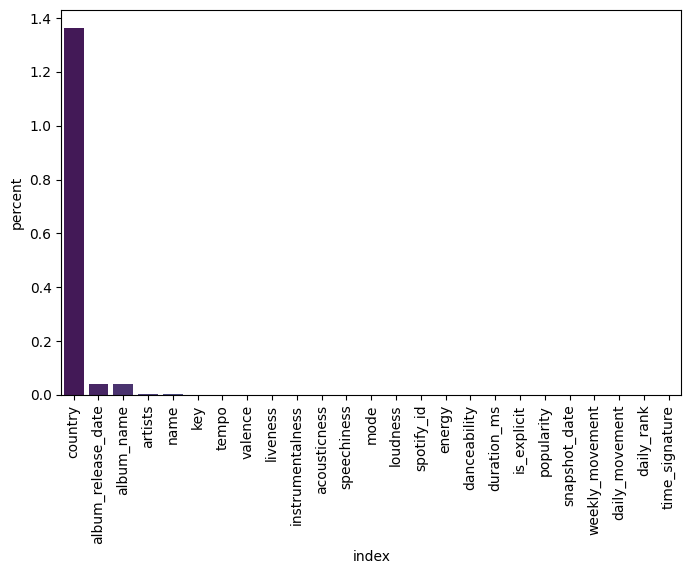

In [16]:
miss_val = pd.DataFrame({"index": percent_missvalues.index, "percent": percent_missvalues})
print(miss_val)


colors = ["red", "green", "blue", "yellow", "purple"]
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
plt.xticks(rotation=90, fontsize=10)
sns.barplot(x=miss_val['index'], y=miss_val['percent'], data=miss_val, palette='viridis')

In [17]:
miss_col=['country','album_release_date','album_name','artists','name' ]
for i in miss_col:
   spotify_data[i].fillna(spotify_data[i].mode()[0],axis=0,inplace=True)

In [18]:
spotify_data.isna().sum()

spotify_id            0
name                  0
artists               0
daily_rank            0
daily_movement        0
weekly_movement       0
country               0
snapshot_date         0
popularity            0
is_explicit           0
duration_ms           0
album_name            0
album_release_date    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
dtype: int64

In [19]:
#To determine unique values
for i in spotify_data.columns:
    print(i,':\n',spotify_data[i].unique())

spotify_id :
 ['6tNQ70jh4OwmPGpYy6R2o9' '7AYmToZ5y67fBjq4RLFbuq'
 '1BxfuPKGuaTgP7aM0Bbdwr' ... '7E8LK4R9gAkSG4CD1kqvsX'
 '0SWDToufOxRVIngk8c1oZi' '5eID9KNVJV2fDSPQGzQHQg']
name :
 ['Beautiful Things' "TEXAS HOLD 'EM" 'Cruel Summer' ... 'Virtuální drogy'
 'AMBIENTE ERRADO - Ao Vivo' 'Oficializar - Ao Vivo']
artists :
 ['Benson Boone' 'Beyoncé' 'Taylor Swift' ... 'Dirty Harry'
 'Nino Xypolitas' 'Gusttavo Lima, Maiara & Maraisa']
daily_rank :
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
daily_movement :
 [  0   1   2  -3  -1   3  -9  -2   5   4   8   9   7   6 -16 -23 -22  -4
  10 -11  -6  -8  -5  14 -13  -7  12 -14 -10  17  11  19  15 -20 -33  38
 -17 -12  29 -15 -18  13  16  35  18  21 -27  32 -19  20 -35 -32  47 -25
  30  44 -29  33  43  28  40  37  34  23  26  39 -21  25 -31  36  48  46
  45  42  41  27  49 -24  24  31  22 -26 -47 -30 -28 -38 -34 -49 -37 -39
 -36 -43 -45 -42 -

In [20]:
#Count of 'name', 'artists', 'country', 'album_name', 'album_release_date'
print(spotify_data['name'].value_counts,('\n'))
print(spotify_data['artists'].value_counts,('\n'))
print(spotify_data['country'].value_counts,('\n'))
print(spotify_data['album_name'].value_counts,('\n'))
print(spotify_data['album_release_date'].value_counts,('\n'))

<bound method IndexOpsMixin.value_counts of 0                          Beautiful Things
1                            TEXAS HOLD 'EM
2                              Cruel Summer
3                                 La Diabla
4                                  CARNIVAL
                        ...                
455685            Slime You Out (feat. SZA)
455686    SAY MY GRACE (feat. Travis Scott)
455687                               People
455688                           Rainy Days
455689                                Prada
Name: name, Length: 455690, dtype: object> 

<bound method IndexOpsMixin.value_counts of 0                          Benson Boone
1                               Beyoncé
2                          Taylor Swift
3                                  Xavi
4         ¥$, Kanye West, Ty Dolla $ign
                      ...              
455685                       Drake, SZA
455686             Offset, Travis Scott
455687                         Libianca
455688                 

# EXPLORATORY DATA ANALYSIS(EDA)

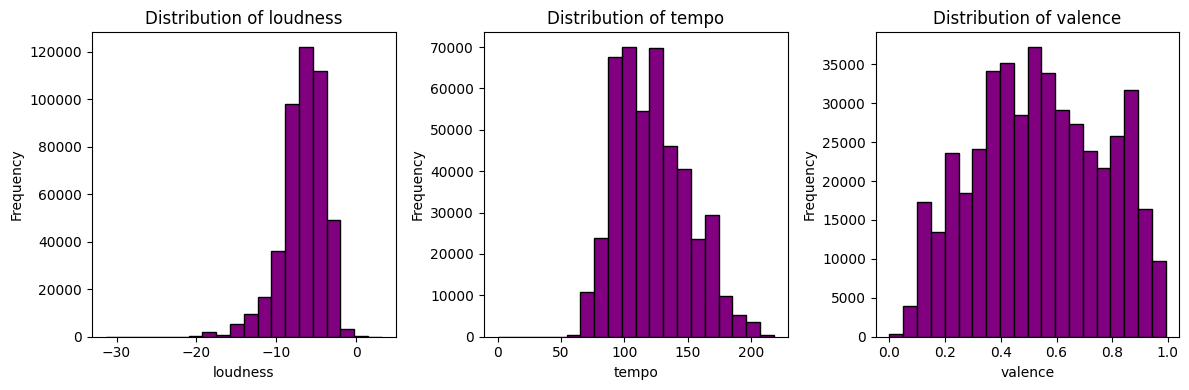

In [21]:
audio_features = ['loudness', 'tempo', 'valence']
plt.figure(figsize=(12, 4))
for i, feature in enumerate(audio_features, 1):
    plt.subplot(1, len(audio_features), i)
    plt.hist(spotify_data[feature], bins=20, color='purple', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

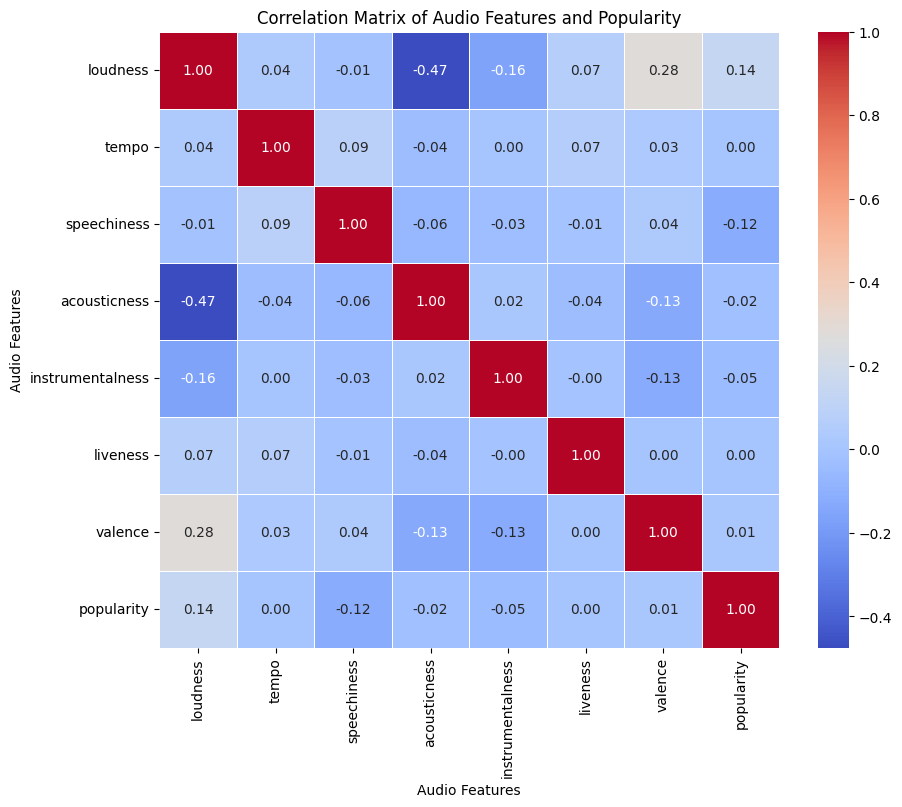

In [22]:
audio_features = ['loudness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
popularity = 'popularity'

correlation_matrix = spotify_data[audio_features + [popularity]].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Audio Features and Popularity')
plt.xlabel('Audio Features')
plt.ylabel('Audio Features')
plt.show()

In [23]:
spotify_data['album_release_date']=pd.to_datetime(spotify_data['album_release_date'])
spotify_data['release_year'] = spotify_data['album_release_date'].dt.year
spotify_data['release_month'] = spotify_data['album_release_date'].dt.month


In [24]:
spotify_data.dtypes

spotify_id                    object
name                          object
artists                       object
daily_rank                     int64
daily_movement                 int64
weekly_movement                int64
country                       object
snapshot_date                 object
popularity                     int64
is_explicit                     bool
duration_ms                    int64
album_name                    object
album_release_date    datetime64[ns]
danceability                 float64
energy                       float64
key                            int64
loudness                     float64
mode                           int64
speechiness                  float64
acousticness                 float64
instrumentalness             float64
liveness                     float64
valence                      float64
tempo                        float64
time_signature                 int64
release_year                   int32
release_month                  int32
d

Text(0.5, 1.0, 'Popularity Across Month')

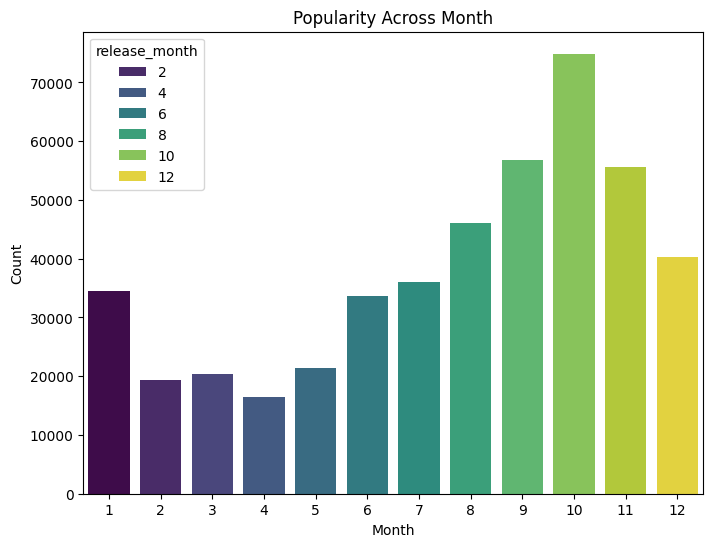

In [25]:
spotify_data['release_month'].value_counts()
plt.figure(figsize=(8,6))
sns.countplot(x=spotify_data['release_month'],hue=spotify_data['release_month'],palette='viridis')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Popularity Across Month')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70],
 [Text(0, 0, '1900'),
  Text(1, 0, '1942'),
  Text(2, 0, '1945'),
  Text(3, 0, '1947'),
  Text(4, 0, '1953'),
  Text(5, 0, '1957'),
  Text(6, 0, '1959'),
  Text(7, 0, '1960'),
  Text(8, 0, '1961'),
  Text(9, 0, '1962'),
  Text(10, 0, '1963'),
  Text(11, 0, '1964'),
  Text(12, 0, '1965'),
  Text(13, 0, '1967'),
  Text(14, 0, '1968'),
  Text(15, 0, '1969'),
  Text(16, 0, '1970'),
  Text(17, 0, '1971'),
  Text(18, 0, '1972'),
  Text(19, 0, '1973'),
  Text(20, 0, '1974'),
  Text(21, 0, '1975'),
  Text(22, 0, '1976'),
  Text(23, 0, '1977'),
  Text(24, 0, '1978'),
  Text(25, 0, '197

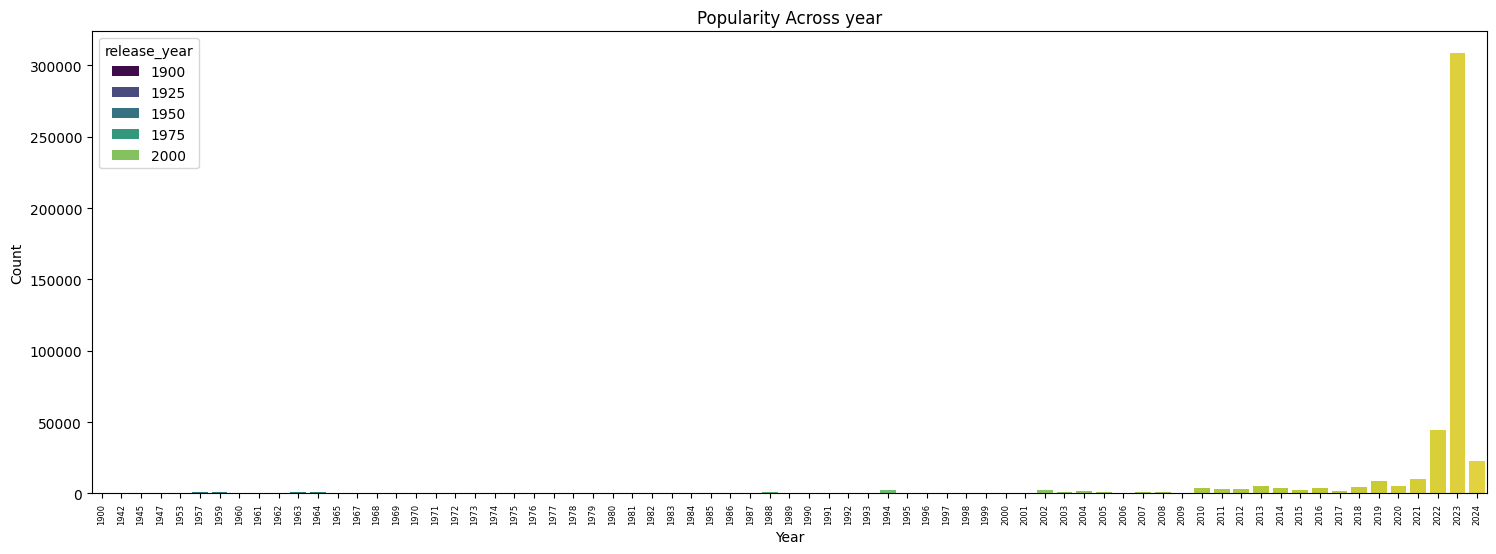

In [26]:
spotify_data['release_year'].value_counts()
plt.figure(figsize=(18,6))
sns.countplot(x=spotify_data['release_year'],hue=spotify_data['release_year'],palette='viridis')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Popularity Across year')
plt.xticks(rotation=90,fontsize=6)

<ipython-input-27-ae6640eb6c51>:10: UserWarning: Glyph 38515 (\N{CJK UNIFIED IDEOGRAPH-9673}) missing from current font.
  plt.tight_layout()
<ipython-input-27-ae6640eb6c51>:10: UserWarning: Glyph 21331 (\N{CJK UNIFIED IDEOGRAPH-5353}) missing from current font.
  plt.tight_layout()
<ipython-input-27-ae6640eb6c51>:10: UserWarning: Glyph 36066 (\N{CJK UNIFIED IDEOGRAPH-8CE2}) missing from current font.
  plt.tight_layout()
<ipython-input-27-ae6640eb6c51>:10: UserWarning: Glyph 30439 (\N{CJK UNIFIED IDEOGRAPH-76E7}) missing from current font.
  plt.tight_layout()
<ipython-input-27-ae6640eb6c51>:10: UserWarning: Glyph 28698 (\N{CJK UNIFIED IDEOGRAPH-701A}) missing from current font.
  plt.tight_layout()
<ipython-input-27-ae6640eb6c51>:10: UserWarning: Glyph 38662 (\N{CJK UNIFIED IDEOGRAPH-9706}) missing from current font.
  plt.tight_layout()
<ipython-input-27-ae6640eb6c51>:10: UserWarning: Glyph 24373 (\N{CJK UNIFIED IDEOGRAPH-5F35}) missing from current font.
  plt.tight_layout()
<ipyth

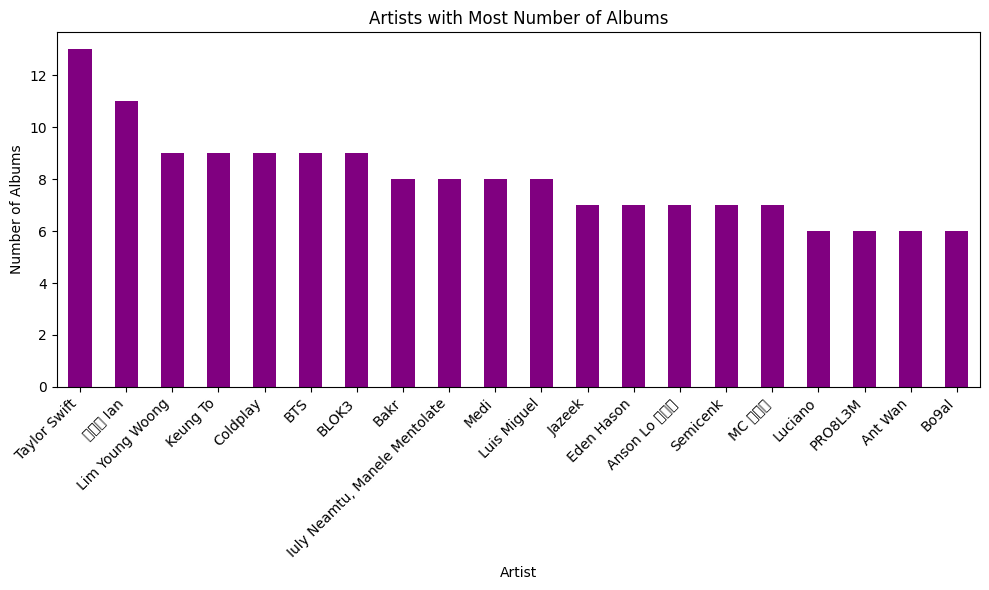

In [27]:

artists_album_counts = spotify_data.groupby('artists')['album_name'].nunique().sort_values(ascending=False)
max_album_count=artists_album_counts
artists_with_most_albums = artists_album_counts[artists_album_counts == max_album_count]
plt.figure(figsize=(10, 6))
artists_with_most_albums.head(20).plot(kind='bar', color='purple')
plt.title('Artists with Most Number of Albums')
plt.xlabel('Artist')
plt.ylabel('Number of Albums')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()


In [28]:
# albums of taylor swift
taylor_swift_albums = spotify_data[spotify_data['artists'] == 'Taylor Swift']
print(taylor_swift_albums['album_name'].unique())


['Lover' 'Midnights' "1989 (Taylor's Version)" 'reputation'
 "Fearless (Taylor's Version)" 'folklore' 'evermore'
 "Speak Now (Taylor's Version)" 'nadie sabe lo que va a pasar mañana'
 "You're Losing Me (From The Vault)" 'Christmas Tree Farm' '1989'
 'The Cruelest Summer']


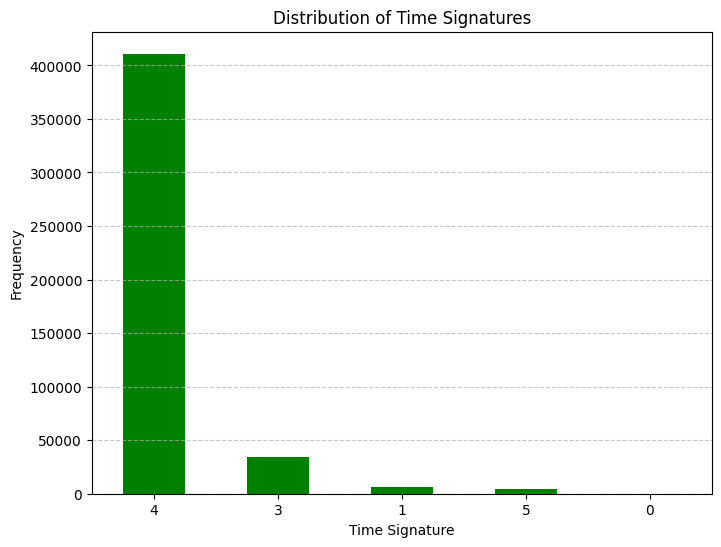

In [29]:
def time_signature_analysis(data):
    time_signatures = data['time_signature']
    signature_counts = time_signatures.value_counts()

    plt.figure(figsize=(8, 6))
    signature_counts.plot(kind='bar', color='green')
    plt.title('Distribution of Time Signatures')
    plt.xlabel('Time Signature')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
time_signature_analysis(spotify_data)


In [30]:
# def plot_artists_by_country(data):

#     artist_counts_by_country = data.groupby('country')['artists'].nunique().reset_index()
#     total_artists = artist_counts_by_country['artists'].sum()
#     artist_counts_by_country['percentage'] = artist_counts_by_country['artists'] / total_artists * 100

#     plt.figure(figsize=(18,10))
#     pie = plt.pie(artist_counts_by_country['artists'], labels=artist_counts_by_country['country'],  startangle=140)
#     plt.title('Artists by Country')
#     plt.axis('equal')

#     legend_labels = [f'{country} ({percentage:.2f}%)' for country, percentage in zip(artist_counts_by_country['country'], artist_counts_by_country['percentage'])]
#     plt.legend(pie[0], legend_labels, loc="best",ncol=2)
#     plt.subplots_adjust(left=0.01)
#     plt.show()

# plot_artists_by_country(spotify_data)

In [31]:
num = [i for i in spotify_data.columns if spotify_data[i].dtype!='O']
print('The numerical variables are',num)

features_to_drop = ['daily_rank', 'daily_movement', 'weekly_movement','release_month','release_year','popularity','is_explicit','album_release_date','mode','time_signature']
numerical_filtered = [feature for feature in num if feature not in features_to_drop]
numerical_filtered

The numerical variables are ['daily_rank', 'daily_movement', 'weekly_movement', 'popularity', 'is_explicit', 'duration_ms', 'album_release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'release_year', 'release_month']


['duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [32]:
#categorical features
object = [i for i in spotify_data.columns if spotify_data[i].dtype=='O']
print('The categorical variables are',object)

The categorical variables are ['spotify_id', 'name', 'artists', 'country', 'snapshot_date', 'album_name']


In [33]:
# spotify_data=spotify_data.drop(['album_release_date'],axis=1)

In [34]:
cat_col=['is_explicit','album_release_date']
spotify_data.drop(columns=cat_col,axis=1,inplace=True)

**Boxplot of Numerical Features**

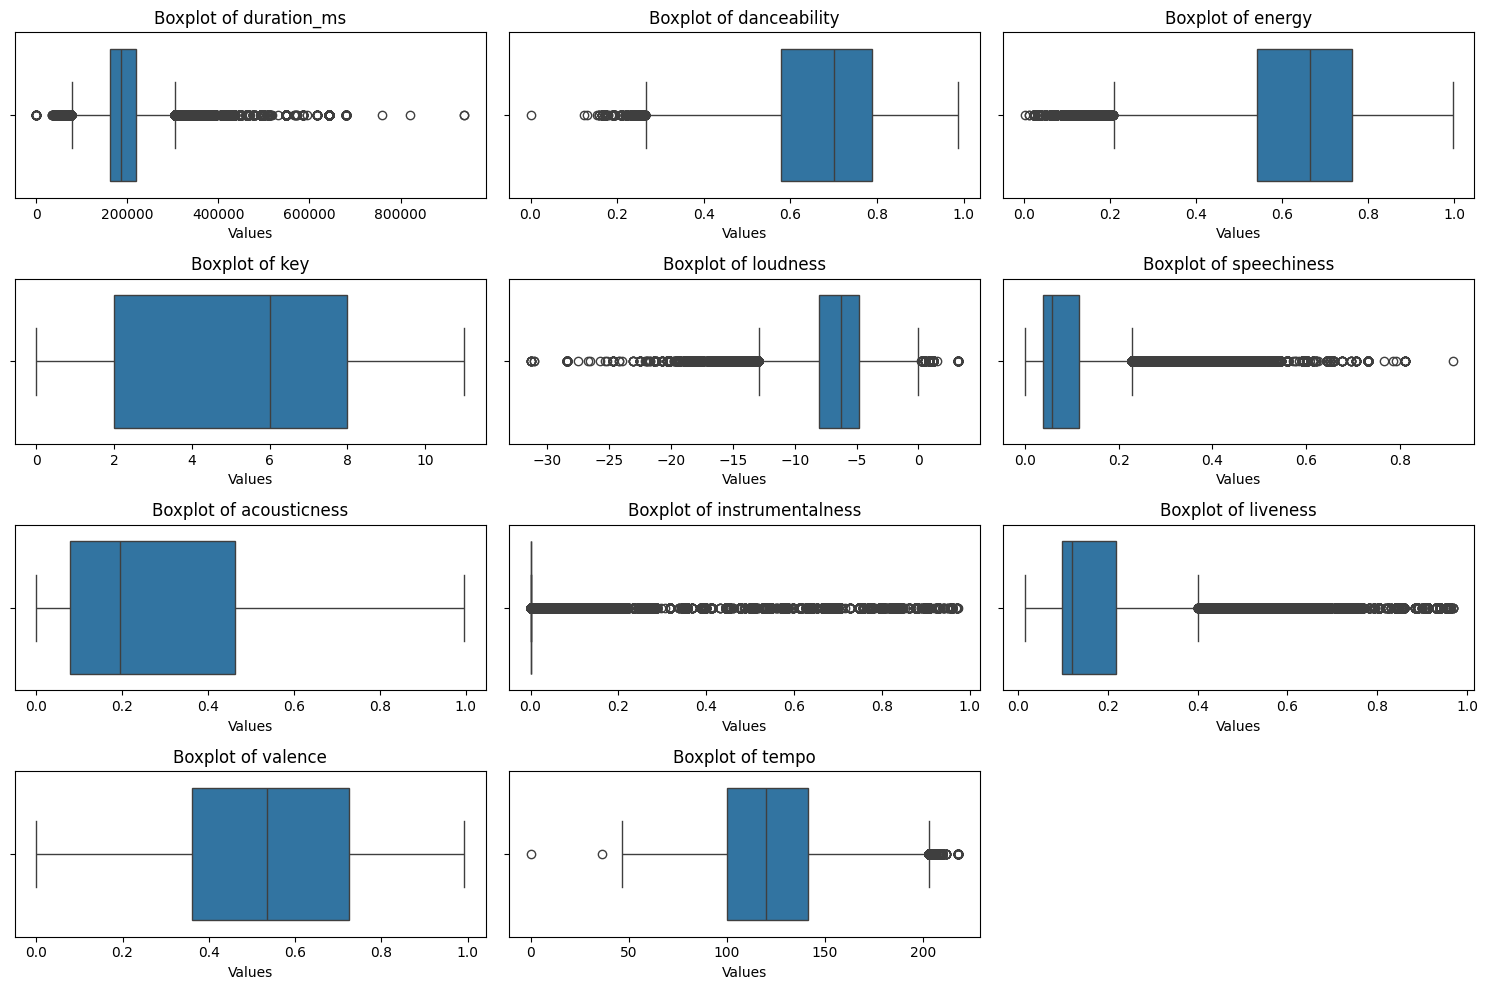

In [35]:
def plot_numerical_boxplots(spotify_data, numerical_features, num_cols=3, figsize=(15, 10)):
    num_plots = len(numerical_features)
    num_rows = (num_plots - 1) // num_cols + 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    if num_plots > 1:
        axes = axes.flatten()
    for i, feature in enumerate(numerical_features):
        sns.boxplot(x=spotify_data[feature], ax=axes[i])
        axes[i].set_title(f'Boxplot of {feature}')
        axes[i].set_xlabel('Values')
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_numerical_boxplots(spotify_data, numerical_filtered)

**Scatterplot of Numerical Features**

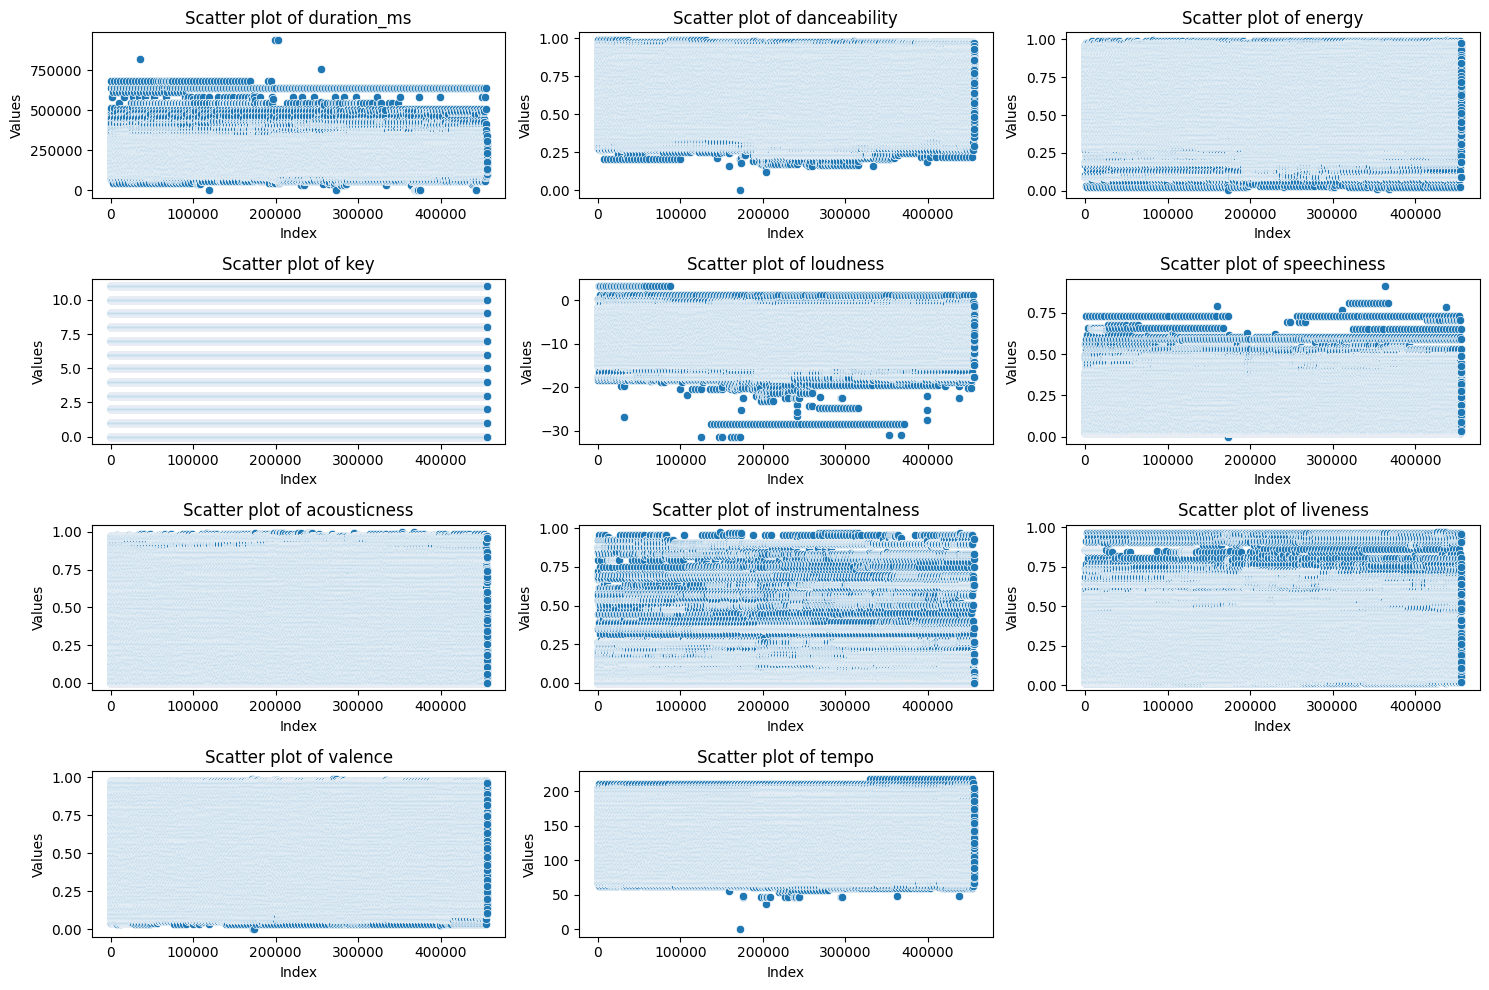

In [36]:
def plot_numerical_scatterplots(df, numerical_features, num_cols=3, figsize=(15, 10)):
    num_plots = len(numerical_features)
    num_rows = (num_plots - 1) // num_cols + 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    if num_plots > 1:
        axes = axes.flatten()
    for i, feature in enumerate(numerical_features):
        sns.scatterplot(x=df.index, y=df[feature], ax=axes[i])
        axes[i].set_title(f'Scatter plot of {feature}')
        axes[i].set_xlabel('Index')
        axes[i].set_ylabel('Values')
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
plot_numerical_scatterplots(spotify_data, numerical_filtered)

In [37]:
# for feature in numerical_filtered:
#     plt.figure(figsize=(15, 8))
#     sns.boxplot(x=df[feature])
#     plt.title(f'Boxplot of {feature}')
#     plt.xlabel('Values')
#     plt.show()

# **LABEL ENCODING**
Label encoding is crucial for transforming categorical data into a numerical format, essential for machine learning algorithms' input. By assigning unique numerical labels to categories, it enables algorithms to process and analyze data effectively. However, it's essential to be mindful of potential ordinal relationships introduced by label encoding, which may affect model interpretation and performance.

In [38]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for i in object:
  spotify_data[i]=label.fit_transform(spotify_data[i])

# **OUTLIER REMOVAL**
Outlier removal is a critical step in data preprocessing, aimed at identifying and eliminating data points that deviate significantly from the rest of the dataset. By removing outliers, the integrity and accuracy of statistical analyses and machine learning models are enhanced, as outliers can distort patterns and skew results. Furthermore, outlier removal ensures that models are trained on more representative and reliable data, ultimately leading to better predictions and decision-making.

In [39]:
def remove_outliers(spotify_data, columns):
    for col in columns:
        q1 = spotify_data[col].quantile(0.20)
        q3 = spotify_data[col].quantile(0.80)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        spotify_data= spotify_data[(spotify_data[col] >= lower_bound) & (spotify_data[col] <= upper_bound)]
    return spotify_data

cleaned_data=remove_outliers(spotify_data, numerical_filtered)


In [40]:
cleaned_data

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,duration_ms,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,release_month
0,6528,666,531,1,0,1,41,124,98,180304,...,1,0.0603,0.1510,0.000000,0.140,0.219,105.029,3,2024,1
1,6780,5054,541,2,1,48,41,124,55,235636,...,1,0.0720,0.5880,0.000000,0.135,0.353,110.024,4,2024,2
2,1121,1123,4100,3,1,1,41,124,99,178426,...,1,0.1570,0.1170,0.000021,0.105,0.564,169.994,4,2019,8
3,424,2833,4482,4,2,-3,41,124,99,172264,...,0,0.0409,0.2550,0.000000,0.236,0.697,131.842,3,2023,11
4,3778,840,4732,5,-3,45,41,124,74,264324,...,1,0.1590,0.1890,0.000000,0.339,0.311,148.144,4,2024,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455685,161,4786,1162,46,4,0,0,0,84,310490,...,0,0.0502,0.5080,0.000000,0.259,0.105,88.880,3,2023,10
455686,2182,4474,3198,47,3,0,0,0,80,173253,...,1,0.0452,0.0585,0.000000,0.132,0.476,121.879,4,2023,10
455687,2011,4077,2494,48,2,0,0,0,88,184791,...,0,0.0678,0.5510,0.000013,0.102,0.693,124.357,5,2022,12
455688,5668,4336,4320,49,1,0,0,0,88,179560,...,0,0.0875,0.7390,0.000000,0.148,0.282,74.828,4,2023,8


In [41]:
cleaned_data.columns

Index(['spotify_id', 'name', 'artists', 'daily_rank', 'daily_movement',
       'weekly_movement', 'country', 'snapshot_date', 'popularity',
       'duration_ms', 'album_name', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'release_year',
       'release_month'],
      dtype='object')

**Lineplot Diagram**

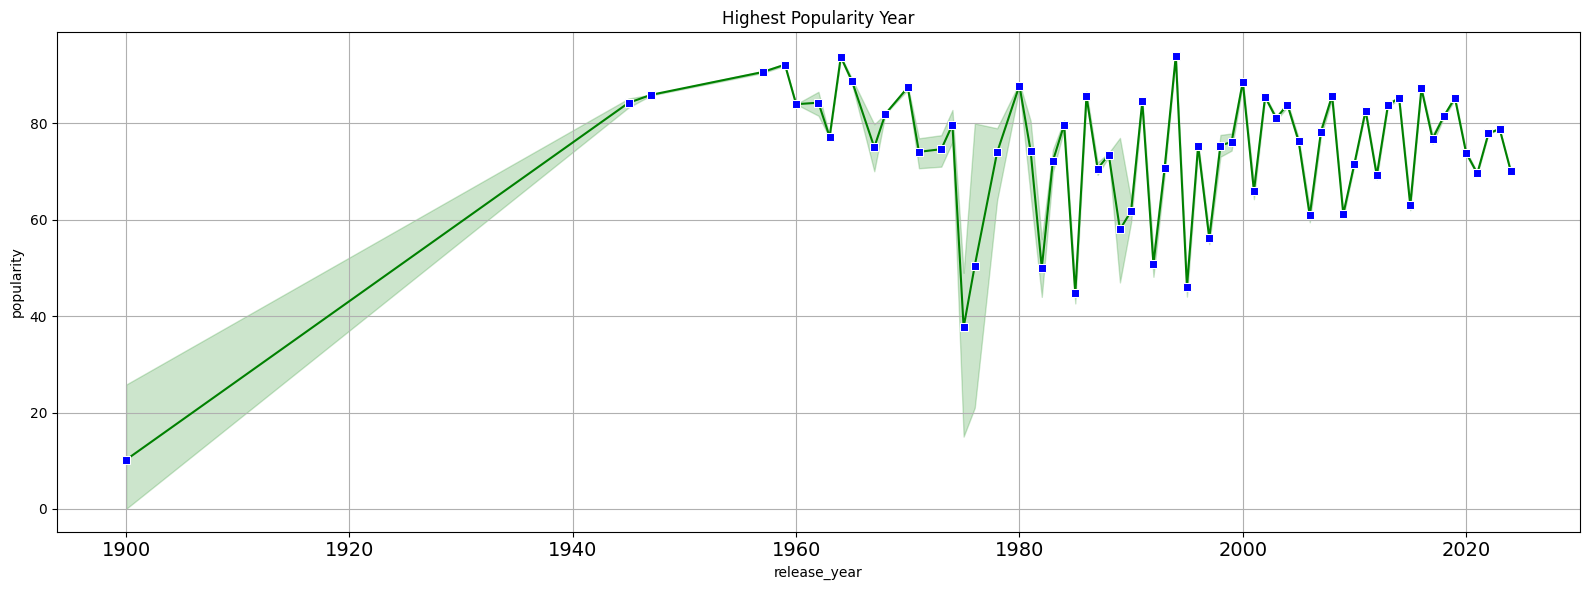

In [42]:
#visualizing which year has the highest popularity for the song

plt.figure(figsize=(16,6))
sns.lineplot(x=cleaned_data['release_year'], y=cleaned_data['popularity'],marker='s',markerfacecolor='blue',color='g')
plt.grid()
plt.title('Highest Popularity Year')
plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()

In [43]:
# def remove(df,lst):
#   lst=sorted(set(lst))
#   df=df.drop(lst)
#   return df

In [44]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for i in object:
  cleaned_data[i]=label.fit_transform(cleaned_data[i])

# **FEATURE SELECTION**

Feature selection is a critical process in machine learning that involves choosing the most relevant features from the dataset. It plays a vital role in improving model performance by reducing overfitting, simplifying models, and enhancing interpretability. By selecting the most informative features, unnecessary noise and dimensionality are reduced, leading to more efficient and accurate predictions.

# **ANALYSIS OF VARIANCE (ANOVA) TEST**

Anova feature selection, also known as analysis of variance, is a statistical method used to identify significant features in a dataset by evaluating their relationship with the target variable. It assesses the variance between groups and within groups to determine feature importance. Anova helps in selecting the most relevant features, thereby reducing dimensionality and improving model performance by focusing on the features that contribute the most to predicting the target variable. Utilizing Anova feature selection ensures that models are trained on the most informative features, leading to better generalization and interpretability of the results.

# **SPLITTING X AND Y**

In [45]:
x = cleaned_data.drop('popularity', axis=1).values
y = cleaned_data['popularity'].values

In [46]:
#Creating Dataframe
x=pd.DataFrame(x)
y=pd.DataFrame(y)

In [47]:
# Train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
print(f"Train Shape : {x_train.shape} --------- Test Shape : {x_test.shape}")


Train Shape : (242576, 24) --------- Test Shape : (103962, 24)


In [48]:
x_train.values

array([[3.931e+03, 6.890e+02, 2.496e+03, ..., 4.000e+00, 2.023e+03,
        4.000e+00],
       [2.623e+03, 4.622e+03, 1.666e+03, ..., 4.000e+00, 2.023e+03,
        1.100e+01],
       [1.971e+03, 1.487e+03, 3.042e+03, ..., 4.000e+00, 2.005e+03,
        1.000e+00],
       ...,
       [3.358e+03, 3.371e+03, 1.258e+03, ..., 3.000e+00, 2.012e+03,
        6.000e+00],
       [1.510e+03, 2.051e+03, 1.062e+03, ..., 4.000e+00, 2.023e+03,
        6.000e+00],
       [3.306e+03, 2.133e+03, 1.414e+03, ..., 4.000e+00, 2.023e+03,
        1.100e+01]])

In [49]:
y_train.values

array([[87],
       [64],
       [84],
       ...,
       [44],
       [72],
       [97]])

In [50]:
cleaned_data.dtypes

spotify_id            int64
name                  int64
artists               int64
daily_rank            int64
daily_movement        int64
weekly_movement       int64
country               int64
snapshot_date         int64
popularity            int64
duration_ms           int64
album_name            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
release_year          int32
release_month         int32
dtype: object

In [51]:
# print(f"x_train data type: {x_train.dtype}")
# print(f"y_train data type: {y_train.dtype}")

In [52]:
x_train = pd.DataFrame(x_train)

In [53]:
non_numeric_values = x_train[~x_train.applymap(np.isreal)].dropna()
print(non_numeric_values.head())

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Index: []

[0 rows x 24 columns]


In [54]:
x_train = x_train[x_train.applymap(np.isreal)].dropna()

In [55]:
print("Data types in x_train:")
print(x_train.dtypes.unique())


Data types in x_train:
[dtype('float64')]


In [56]:
non_numeric_columns = x_train.select_dtypes(exclude=['number']).columns
print("Non-numeric columns in x_train:")
print(non_numeric_columns)


Non-numeric columns in x_train:
RangeIndex(start=0, stop=0, step=1)


In [57]:
for col in non_numeric_columns:
    print(f"Unique values in column {col}:")
    print(x_train[col].unique())


If there is a mix of **Numeric values** and possibly some **Non-numeric values** such as string or special characters. It may occur error because the feature values are not uniformaly numeric or string-like, causing confusion for the **LabelEncoder**. If there are non-numeric values present, you'll need to clean or preprocess the data accordingly.

In [58]:
# Example of grouping infrequent categories
def group_infrequent_categories(column, threshold):
    value_counts = column.value_counts()
    infrequent_categories = value_counts[value_counts < threshold].index
    column = column.apply(lambda x: 'Other' if x in infrequent_categories else x)
    return column

# Specify the threshold for grouping infrequent categories
threshold = 100  # Adjust this threshold based on your dataset


In [59]:
# Converting non-numeric values to NaN
x_train_numeric = x_train.apply(pd.to_numeric, errors='coerce')
# Imputing missing values
x_train_numeric.fillna(x_train_numeric.mean(), inplace=True)
# #encoding columns using get_dummies
x_train_encoded = pd.get_dummies(x_train, drop_first=True, sparse=True)


# OneHotEncoding

To handle non-numeric columns in x_train, you need to encode them properly before fitting the model. One common approach is to use one-hot encoding for categorical variables.

In [60]:
from sklearn.preprocessing import OneHotEncoder

# Apply OneHotEncoder to categorical columns in x_train
categorical_cols = x_train.select_dtypes(include=['object']).columns.tolist()
if categorical_cols:
    onehot_encoder = OneHotEncoder(drop='first')
    x_train_encoded = onehot_encoder.fit_transform(x_train[categorical_cols])
    x_train_encoded = pd.DataFrame(x_train_encoded, columns=onehot_encoder.get_feature_names_out(categorical_cols), index=x_train.index)
    x_train_numeric.drop(columns=categorical_cols, inplace=True)
    x_train_numeric = pd.concat([x_train_numeric, x_train_encoded], axis=1)

# Convert x_train_encoded to numeric, handling non-numeric values
x_train_numeric = x_train_encoded.apply(pd.to_numeric, errors='coerce')
x_train_numeric.fillna(x_train_numeric.mean(), inplace=True)  # Impute missing values with mean

print('Data type: ', x_train_numeric.dtypes)


Data type:  0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
dtype: object




*   LabelEncoder is applied to each non-numeric column in x_train.

*  OneHotEncoder is applied to categorical columns (if any) in x_train.

*  The encoded columns are concatenated back to the original x_train.

*  LabelEncoder is applied to y_train if it's not already numeric.


After this preprocessing, x_train should contain only numeric data, and y_train should be numeric as well, which can be used for further processing such as feature selection.

In [61]:
# Check for any non-numeric values in x_train_encoded
non_numeric_values = x_train_encoded.applymap(lambda x: isinstance(x, str))
print(non_numeric_values.any().any())  # Check if any non-numeric values exist

# Verify the data types of all columns in x_train_numeric
print(x_train_numeric.dtypes)


False
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
dtype: object


In [62]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of x_train: (242576, 24)
Shape of y_train: (242576, 1)


In [63]:
#finding best features for model
from sklearn.feature_selection import SelectKBest,f_classif
selector = SelectKBest(score_func=f_classif,k=9)
selector.fit(x_train,y_train)
selected_indices = selector.get_support(indices=True)
selected_features = x_train.columns[selected_indices]
x_train_selected = x_train.iloc[:, selected_indices]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **TRAINING DATA**

In [64]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=7)  # Select top 2 features using ANOVA F-value
X_selected = selector.fit_transform(x, y)

# Access the scores of each feature
scores = selector.scores_
print("Feature Scores:", scores)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature Scores: [ 150.26587691  221.61565434  197.13664694  195.43153134  520.63539349
  219.91158806   85.74934336   50.90282715  122.70166126  214.92493014
   91.22738412   73.36753404   72.5326354   216.62241484  115.93619091
  107.76224169   83.98463612   90.47533275   76.90934229  155.11637242
   65.51627529 1466.33326676   80.70997897   82.13200795]


In [65]:
#selected best 5 features
cols = selector.get_support(indices=True)
cols

array([ 1,  2,  4,  5,  9, 13, 21])

In [66]:
#creating a separate dataset with selected features
spotify_final = cleaned_data.iloc[:, cols]
spotify_final

,name,artists,daily_movement,weekly_movement,duration_ms,key,tempo
0,454,398,0,1,180304,10,105.029
1,3524,406,1,48,235636,2,110.024
2,785,3019,1,1,178426,9,169.994
3,1954,3296,2,-3,172264,11,131.842
4,574,3473,-3,45,264324,1,148.144
...,...,...,...,...,...,...,...
455685,3343,843,4,0,310490,5,88.880
455686,3118,2332,3,0,173253,10,121.879
455687,2845,1815,2,0,184791,10,124.357
455688,3025,3185,1,0,179560,9,74.828


In [67]:
#Adding popularity column to new dataset
spotify_final['popularity'] = spotify_data['popularity']
spotify_final.to_csv('selecte',index=False)
spotify_final

<ipython-input-67-20846ab6af6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_final['popularity'] = spotify_data['popularity']


,name,artists,daily_movement,weekly_movement,duration_ms,key,tempo,popularity
0,454,398,0,1,180304,10,105.029,98
1,3524,406,1,48,235636,2,110.024,55
2,785,3019,1,1,178426,9,169.994,99
3,1954,3296,2,-3,172264,11,131.842,99
4,574,3473,-3,45,264324,1,148.144,74
...,...,...,...,...,...,...,...,...
455685,3343,843,4,0,310490,5,88.880,84
455686,3118,2332,3,0,173253,10,121.879,80
455687,2845,1815,2,0,184791,10,124.357,88
455688,3025,3185,1,0,179560,9,74.828,88


# **SHOWING THE CORRELATION BETWEEN THE FEATURES**

In [68]:
correlation_matrix = spotify_final.corr()

<Axes: >

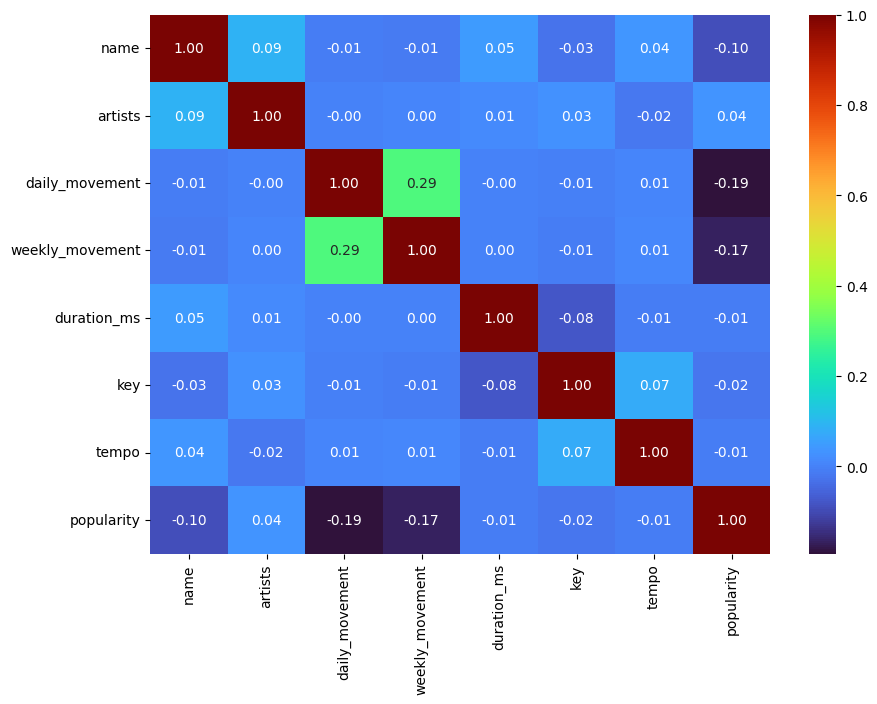

In [69]:
#heatmap
plt.figure(figsize=(10,7))
sns.heatmap(spotify_final.corr(),annot=True,fmt=".2f",cmap='turbo' )

 **NORMALIZATION**

**MODELLING WITH LINEAR REGRESSION**

In [70]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(x_train, y_train)
y_pred1 = model_1.predict(x_test)
y_pred1

array([[78.46427228],
       [77.10842824],
       [80.39947246],
       ...,
       [77.80427486],
       [75.02299892],
       [77.85894551]])

**MODELLING WITH DECISION TREE REGRESSION**

In [71]:
from sklearn.tree import DecisionTreeRegressor
model_2 = DecisionTreeRegressor(criterion='squared_error')
model_2.fit(x_train,y_train)
y_pred2 = model_2.predict(x_test)
y_pred2

array([90., 69., 88., ..., 90., 83., 77.])

**MODELLING WITH RANDOM FOREST REGRESSION**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_3 = RandomForestRegressor(n_estimators=101, random_state=42)
model_3.fit(x_train, y_train)
y_pred3 = model_3.predict(x_test)
y_pred3

<ipython-input-72-998004b57c05>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_3.fit(x_train, y_train)


In [ ]:
# from sklearn.tree import plot_tree
# estimator_index = 0
# estimator = model_3.estimators_[estimator_index]
# plt.figure(figsize=(20, 15))
# plot_tree(estimator, feature_names=x_train.columns, filled=True, fontsize=10)
# plt.show()

**MODELLING WITH GRADIENTBOOST REGRESSION**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_5 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_5.fit(x_train, y_train)
y_pred5 = model_5.predict(x_test)
y_pred5

In [ ]:
models = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor]
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
r2_list=[]

In [ ]:
for i in models:
  print("Model Name is ",i)
  print('-'*50)
  mod=i().fit(x_train, y_train)
  y_pred = mod.predict(x_test)
  r2=r2_score(y_test, y_pred)
  r2_list.append(r2)
  print("R2 score:", r2_score(y_test, y_pred))
  print("MAE score:", mean_absolute_error(y_test, y_pred))
  print("MSE score:", mean_squared_error(y_test, y_pred))
  print("MAPE score:", mean_absolute_percentage_error(y_test, y_pred))
  print("="*50)


In [ ]:
model=('LINEAER REGRESSION','DECISION TREE REGRESSOR','RANDOM FOREST REGRESSOR','GRADIENT BOOST REGRESSOR')
best_model = pd.DataFrame({"model": model, "R2 score": r2_list})
fine_model = best_model.sort_values(by="R2 score",ascending=False)
fine_model

In [ ]:
plt.figure(figsize=(8, 6))

plt.xticks(rotation=90, fontsize=8)
sns.barplot(x=fine_model['model'], y=fine_model['R2 score'], data=fine_model, palette='turbo')
plt.xlabel("Models")
plt.ylabel("r2 score")
plt.title("Comparing R2 score of different models")
plt.show()

**Here according to R2 score Random Forest Regression is the best model**

# **MODEL TUNING**

In [ ]:
model = RandomForestRegressor()
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the tree
    # 'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    # 'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}



grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
